March 24th, 2025

# [Whistler anisotropy instability with a cold electron component: Linear theory](https://agupubs.onlinelibrary.wiley.com/doi/full/10.1029/2012JA017631)
### S. Peter Gary, Kaijun Liu, Richard E. Denton, Shuo Wu (2012)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import wofz 
from QLT_equations.rQLT import dispersion_relation
import scipy

In [3]:
%matplotlib inline
import matplotlib
font = {'family' : 'serif',
        'size'   : 20}

matplotlib.rc('font', **font)
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20)

Marginal stability is given by 
$$A_{h} = \frac{T_{\perp h}}{T_{\|h}} - 1 =  \frac{S}{\beta_{\|h}^{\alpha}}$$
where $S$ and $\alpha$ are fitting parameters which vary with the assumed maximum growth rate $\gamma_{m}/ |\Omega_{ce}|$, such that 
$$S = 0.206 -0.107\frac{n_{c}}{n_{0}} -0.0326\frac{n_{c}^2}{n_{0}^2}$$
and 
$$\alpha = 0.574 + 0.178\frac{n_{c}}{n_{0}} -0.198\frac{n_{c}^2}{n_{0}^2}$$

In [4]:
def get_S(nc_n0):
    return 0.206 - 0.107*nc_n0 - 0.0326*(nc_n0**2)

In [5]:
def get_alpha(nc_n0):
    return 0.574 + 0.178*nc_n0 - 0.198*(nc_n0**2)

In [6]:
def get_A(nc_n0, beta_par):
    alpha = get_alpha(nc_n0=nc_n0)
    S = get_S(nc_n0=nc_n0)
    return S/(beta_par**alpha)

In [7]:
beta_par = 10**np.linspace(-1, 1)
nc_n0 = np.linspace(0, 0.95, 4)

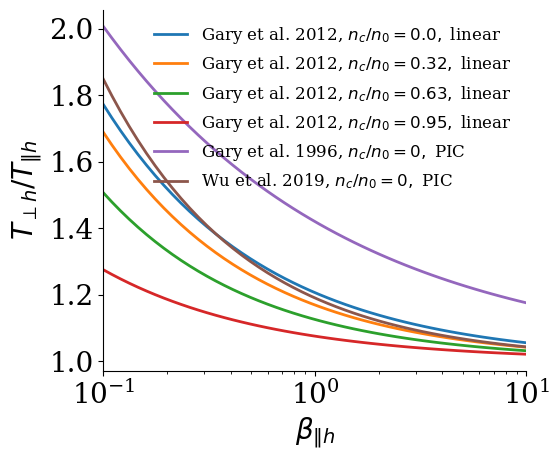

In [8]:
fig, ax = plt.subplots(figsize=(6,5))
for nc in nc_n0:
    A = get_A(nc_n0=nc, beta_par=beta_par)
    ax.plot(beta_par, A+1, label=r"Gary et al. 2012, $n_{c}/n_{0} = " + str(round(nc, 2)) + ",$ linear", linewidth=2)

ax.plot(beta_par, 1+ 0.42/beta_par**0.38, linewidth=2, label=r"Gary et al. 1996, $n_{c}/n_{0} =0,$ PIC")
ax.plot(beta_par, 1+ 0.19/beta_par**0.65, linewidth=2, label=r"Wu et al. 2019, $n_{c}/n_{0} =0,$ PIC")

ax.set_xlim(np.min(beta_par), np.max(beta_par))
ax.set_xscale("log")
ax.set_xlabel(r"$\beta_{\|h}$")
ax.set_ylabel(r"$T_{\perp h}/T_{\|h}$")
legend = ax.legend(loc='upper right', ncols=1, fancybox=False, shadow=False, fontsize=12)
legend.get_frame().set_alpha(0)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.tight_layout()

plt.savefig("figs/gary_2012/A_beta_relation_cold.png", dpi=300, bbox_inches='tight')

In [9]:
nc_nH  = np.array([1,  2,  4, 5])**2

In [10]:
nc_n0 = nc_nH/(nc_nH+1)

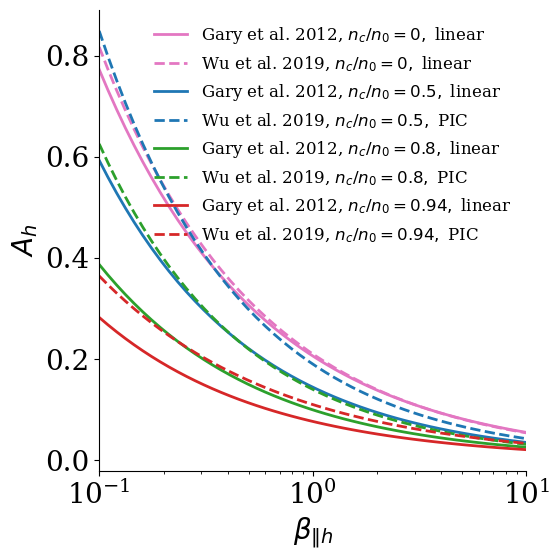

In [11]:
fig, ax = plt.subplots(figsize=(6,6))
ax.plot(beta_par, get_A(nc_n0=0., beta_par=beta_par), c="tab:pink", label=r"Gary et al. 2012, $n_{c}/n_{0} = 0,$ linear", linewidth=2)
ax.plot(beta_par, 0.21/(beta_par**0.59), c="tab:pink",  ls="--", label=r"Wu et al. 2019, $n_{c}/n_{0} = 0,$ linear", linewidth=2)


ax.plot(beta_par, get_A(nc_n0=0.5, beta_par=beta_par), c="tab:blue", label=r"Gary et al. 2012, $n_{c}/n_{0} = 0.5,$ linear", linewidth=2)
ax.plot(beta_par, 0.19/beta_par**0.65, linewidth=2, c="tab:blue", ls="--", label=r"Wu et al. 2019, $n_{c}/n_{0} =0.5,$ PIC")

ax.plot(beta_par, get_A(nc_n0=0.8, beta_par=beta_par), c="tab:green", label=r"Gary et al. 2012, $n_{c}/n_{0} = 0.8,$ linear", linewidth=2)
ax.plot(beta_par, 0.14/beta_par**0.65, linewidth=2, c="tab:green", ls="--", label=r"Wu et al. 2019, $n_{c}/n_{0} =0.8,$ PIC")


ax.plot(beta_par, get_A(nc_n0=0.94, beta_par=beta_par), c="tab:red", label=r"Gary et al. 2012, $n_{c}/n_{0} = 0.94,$ linear", linewidth=2)
ax.plot(beta_par, 0.11/beta_par**0.52, linewidth=2, c="tab:red", ls="--", label=r"Wu et al. 2019, $n_{c}/n_{0} =0.94,$ PIC")



#ax.set_yscale("log")
ax.set_xlim(np.min(beta_par), np.max(beta_par))
ax.set_xscale("log")
ax.set_xlabel(r"$\beta_{\|h}$")
ax.set_ylabel(r"$A_{h}$")
legend = ax.legend(loc='upper right', ncols=1, fancybox=False, shadow=False, fontsize=12)
legend.get_frame().set_alpha(0)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.tight_layout()

plt.savefig("figs/gary_2012/A_beta_relation_cold_wu.png", dpi=300, bbox_inches='tight')

# dispersion relation solver

In [12]:
# range of wavenumber 
q_vec = np.linspace(0.01, 1.5, 100) # vector with all normalized wavenumber

In [13]:
def get_z_vec(q_vec, A_h, A_c, beta_par_c, beta_par_h, beta_par_i, delta):
    z_vec = np.zeros(len(q_vec), dtype="complex128")
    for ii, q in enumerate(q_vec):
        if q < 1.5:
            ic1 = 0.55+ 1e-4j
            ic2 = 0.8+ 1e-4j
        else:
            ic1 = 0.65+ 1e-4j
            ic2 = 0.8+ 1e-4j
        try:
            z_vec[ii] = scipy.optimize.newton(dispersion_relation(q=q, A_c=A_c, beta_par_c=beta_par_c, A_h=A_h, beta_par_h=beta_par_h, beta_par_i=beta_par_i, delta=delta), ic1, tol=1e-15)
            if dispersion_relation(q=q, A_c=A_c, beta_par_c=beta_par_c, A_h=A_h, beta_par_h=beta_par_h, beta_par_i=beta_par_i, delta=delta)(z_vec[ii]) > 1e-10:
                print("q1=", q)
                print("residual1=", np.abs(dispersion_relation(q=q, A_c=A_c, beta_par_c=beta_par_c, A_h=A_h, beta_par_h=beta_par_h, beta_par_i=beta_par_i, delta=delta)(z_vec[ii])))
        except:
            z_vec[ii] = -np.inf*1j
    return z_vec

In [14]:
delta = np.linspace(0.02, 0.99, 100)

In [95]:
gamma = np.zeros(len(delta))
omega = np.zeros(len(delta))
k_max = np.zeros(len(delta))
k_delta = np.zeros(len(delta))

ii = 0 
for nh in delta:
    # hot electrons
    beta_par_h_init = 0.2/(nh) # initial beta parallel 
    A_h_init = 1 # initial anisotropic level
    
    # cold electrons
    beta_par_c_init = beta_par_h_init/100/(1-nh) # initial beta parallel 
    A_c_init = 0. # initial anisotropic level 
    
    # ions 
    beta_par_i_init = beta_par_c_init*(1-nh)

    sol_ = get_z_vec(q_vec=q_vec, 
                     A_c=A_c_init, 
                     beta_par_c=beta_par_c_init, 
                     beta_par_i=beta_par_i_init, 
                     A_h=A_h_init, 
                     beta_par_h=beta_par_h_init, 
                     delta=nh)
    
    gamma[ii] = sol_.imag[np.argmin(np.abs(sol_.real -0.3))]
    k_delta[ii] = np.max(q_vec[np.where(sol_.imag > 0)]) - np.min(q_vec[np.where(sol_.imag > 0)])
    k_max[ii] = q_vec[np.argmin(np.abs(sol_.real -0.3))]/np.sqrt(nh)
    ii+=1

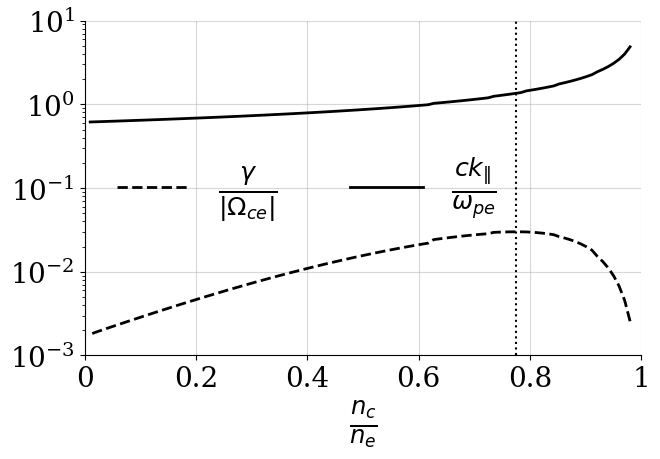

In [115]:
fig, ax = plt.subplots(figsize=(7, 5))

ax.plot(1-delta, gamma, linewidth=2, ls="--", color="black", label=r"$\frac{\gamma}{|\Omega_{ce}|}$")
ax.plot(1-delta, k_max, linewidth=2, color="black", label=r"$\frac{ck_{\|}}{\omega_{pe}}$")


ax.axvline(1-delta[np.argmax(gamma)], color="k", ls=":")

ax.set_xlabel(r"$\frac{n_{c}}{n_{e}}$", fontsize=25)
#ax.set_title(r"$A_{h} = 1$ and $\beta_{\| h} = 0.2$")
ax.set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
ax.set_xticklabels([0, 0.2, 0.4, 0.6, 0.8,  1])
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.grid(alpha=0.5)
ax.set_xlim(0, 1)
ax.set_yscale("log")
ax.set_ylim(1e-3, 10)

legend = ax.legend(loc='center left', ncols=2, fancybox=False, shadow=False, fontsize=26)
legend.get_frame().set_alpha(0)

plt.tight_layout()
plt.savefig("figs/gary_2012/gary_fig_3.png", dpi=300, bbox_inches='tight')

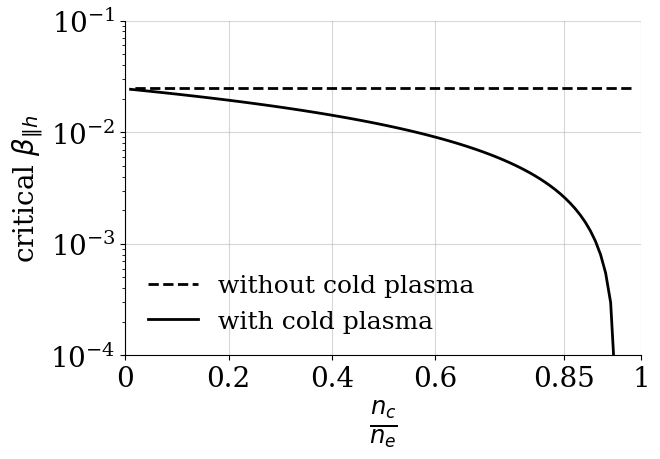

In [107]:
fig, ax = plt.subplots(figsize=(7, 5))

ax.plot(1-delta, 0.025*np.ones(len(delta)), linewidth=2, ls="--", color="black", label=r"without cold plasma")
ax.plot(1-delta, 0.0245*(1 - 1.05*(1-delta)), linewidth=2, color="black", label=r"with cold plasma")
#ax.axvline(0.85, color="k", ls="--")
ax.set_ylabel(r"critical $\beta_{\|h}$")

ax.set_xlabel(r"$\frac{n_{c}}{n_{e}}$", fontsize=25)
#ax.set_title(r"$A_{h} = 1$ and $\beta_{\| h} = 0.2$")
ax.set_xticks([0, 0.2, 0.4, 0.6, 0.85,  1])
ax.set_xticklabels([0, 0.2, 0.4, 0.6, 0.85, 1])
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_ylim(1e-4, 1e-1)
ax.grid(alpha=0.5)
ax.set_xlim(0, 1)
ax.set_yscale("log")

legend = ax.legend(loc='lower left', ncols=1, fancybox=False, shadow=False, fontsize=18)
legend.get_frame().set_alpha(0)

plt.tight_layout()
plt.savefig("figs/gary_2012/gary_fig_1.png", dpi=300, bbox_inches='tight')

# Marginal stability $A_{h}-\beta_{\|h}$

In [17]:
delta = np.array([0.1, 0.2, 0.5, 0.7, 0.9, 1])
A = 2*(10**np.linspace(-1.5, 0, 40))
beta = 2.5 * (10**np.linspace(-2, 0, 30))
q_vec = np.linspace(0.2, 1., 80) # vector with all normalized wavenumber

In [18]:
gamma = np.zeros((len(delta), len(beta), len(A)))

In [19]:
ii = 0 
jj = 0
pp = 0

for pp in range(len(delta)):
    for ii in range(len(beta)):
        for jj in range(len(A)):
            # hot electrons
            beta_par_h_init = beta[ii]/delta[pp] # initial beta parallel 
            
            # cold electrons
            if delta[pp] != 1:
                beta_par_c_init = beta_par_h_init/100/(1-delta[pp]) # initial beta parallel 
                beta_par_i_init = beta_par_c_init*(1-delta[pp])
            else:
                beta_par_c_init = beta_par_h_init/100
                beta_par_i_init = beta_par_c_init
        
            sol_ = get_z_vec(q_vec=q_vec, 
                             A_c=0, 
                             beta_par_c=beta_par_c_init, 
                             beta_par_i=beta_par_i_init, 
                             A_h=A[jj], 
                             beta_par_h=beta_par_h_init, 
                             delta=delta[pp])
            
            gamma[pp, ii, jj] = np.max(sol_.imag)

q1= 1.0
residual1= 1.360647504581221
q1= 1.0
residual1= 0.7684473372405947
q1= 0.9898734177215189
residual1= 1.7372166096768444
q1= 0.9898734177215189
residual1= 0.44252870019498014


/Users/oissan/PycharmProjects/QLT_whistler/QLT_equations/rQLT.py:14: RuntimeWarning: invalid value encountered in scalar multiply
  return 1j * np.sqrt(np.pi) * wofz(xi)
/opt/anaconda3/envs/rom/lib/python3.9/site-packages/scipy/optimize/_zeros_py.py:382: RuntimeWarning: invalid value encountered in scalar divide
  p = (-q1 / q0 * p0 + p1) / (1 - q1 / q0)


q1= 0.9797468354430381
residual1= 0.1484466937568488
q1= 0.939240506329114
residual1= 0.17550331985472167
q1= 0.939240506329114
residual1= 0.1642923492809365
q1= 0.89873417721519
residual1= 1.2967213238092574


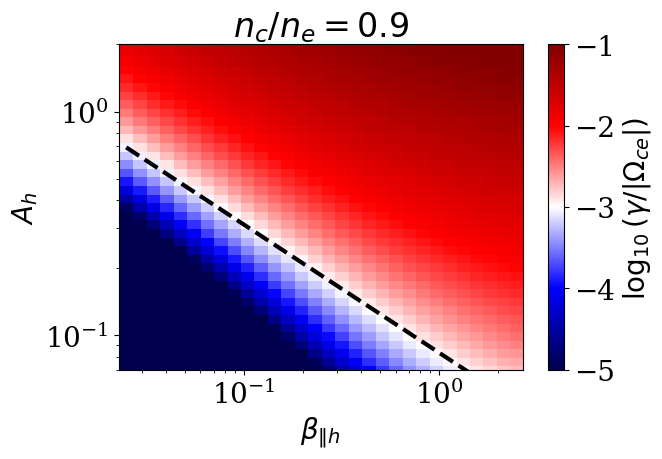

In [31]:
fig, ax = plt.subplots(figsize=(7, 5))
pos = ax.pcolormesh(beta, A, np.log10(gamma[0, :, :]).T, vmin=-5, vmax=-1, cmap="seismic")
ax.plot(beta, get_A(nc_n0=1-delta[0], beta_par=beta), color="black", linewidth=3, ls="--")
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_ylim(0.07, 2)

ax.set_title("$n_{c}/n_{e} = " + str(round(1-delta[0], 2)) + "$")
ax.set_xlabel(r"$\beta_{\|h}$")
ax.set_ylabel(r"$A_{h}$")

cbar = fig.colorbar(pos)
cbar.ax.set_ylabel("$\log_{10}(\gamma/|\Omega_{ce}|)$", rotation=90)
cbar.ax.set_yticks([-1, -2, -3, -4, -5])

plt.tight_layout()
plt.savefig("figs/gary_2012/marginal_stability_" + str(round(1-delta[0], 2)) +".png", dpi=600)

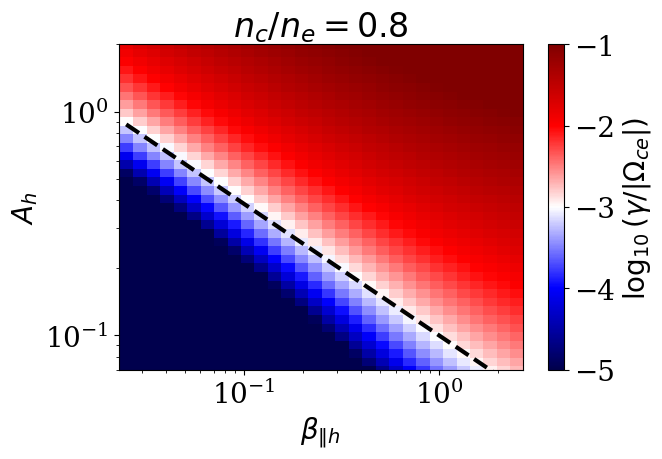

In [32]:
fig, ax = plt.subplots(figsize=(7, 5))
pos = ax.pcolormesh(beta, A, np.log10(gamma[1, :, :]).T, vmin=-5, vmax=-1, cmap="seismic")
ax.plot(beta, get_A(nc_n0=1-delta[1], beta_par=beta), color="black", linewidth=3, ls="--")
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_ylim(0.07, 2)

ax.set_title("$n_{c}/n_{e} = " + str(round(1-delta[1], 2)) + "$")
ax.set_xlabel(r"$\beta_{\|h}$")
ax.set_ylabel(r"$A_{h}$")

cbar = fig.colorbar(pos)
cbar.ax.set_ylabel("$\log_{10}(\gamma/|\Omega_{ce}|)$", rotation=90)
cbar.ax.set_yticks([-1, -2, -3, -4, -5])

plt.tight_layout()
plt.savefig("figs/gary_2012/marginal_stability_" + str(round(1-delta[1], 2)) +".png", dpi=600)

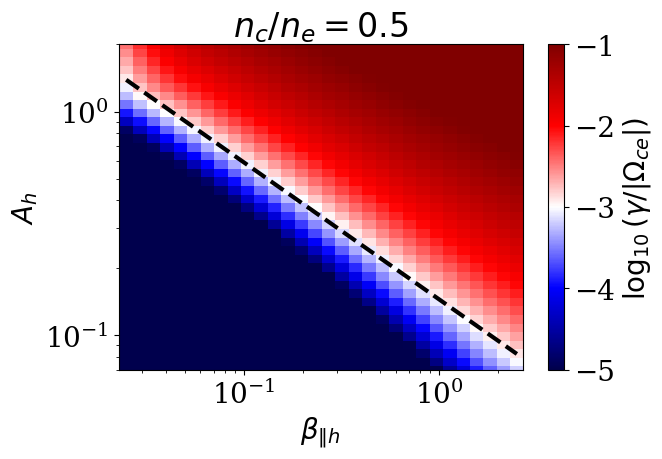

In [33]:
fig, ax = plt.subplots(figsize=(7, 5))
pos = ax.pcolormesh(beta, A, np.log10(gamma[2, :, :]).T, vmin=-5, vmax=-1, cmap="seismic")
ax.plot(beta, get_A(nc_n0=1-delta[2], beta_par=beta), color="black", linewidth=3, ls="--")
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_ylim(0.07, 2)

ax.set_title("$n_{c}/n_{e} = " + str(round(1-delta[2], 2)) + "$")
ax.set_xlabel(r"$\beta_{\|h}$")
ax.set_ylabel(r"$A_{h}$")

cbar = fig.colorbar(pos)
cbar.ax.set_ylabel("$\log_{10}(\gamma/|\Omega_{ce}|)$", rotation=90)
cbar.ax.set_yticks([-1, -2, -3, -4, -5])

plt.tight_layout()
plt.savefig("figs/gary_2012/marginal_stability_" + str(round(1-delta[2], 2)) +".png", dpi=600)

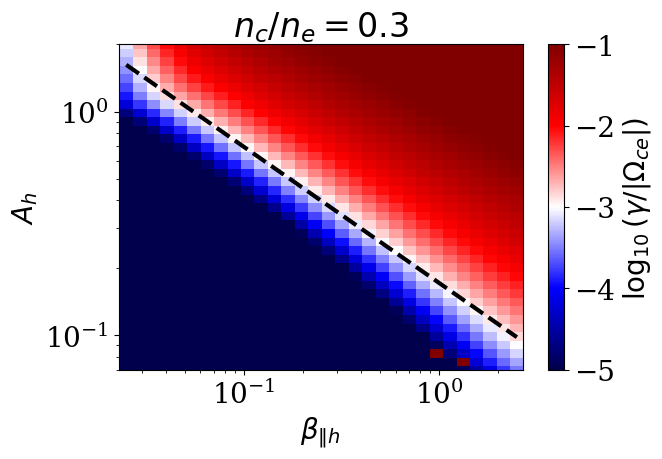

In [34]:
fig, ax = plt.subplots(figsize=(7, 5))
pos = ax.pcolormesh(beta, A, np.log10(gamma[3, :, :]).T, vmin=-5, vmax=-1, cmap="seismic")
ax.plot(beta, get_A(nc_n0=1-delta[3], beta_par=beta), color="black", linewidth=3, ls="--")
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_ylim(0.07, 2)

ax.set_title("$n_{c}/n_{e} = " + str(round(1-delta[3], 2)) + "$")
ax.set_xlabel(r"$\beta_{\|h}$")
ax.set_ylabel(r"$A_{h}$")

cbar = fig.colorbar(pos)
cbar.ax.set_ylabel("$\log_{10}(\gamma/|\Omega_{ce}|)$", rotation=90)
cbar.ax.set_yticks([-1, -2, -3, -4, -5])

plt.tight_layout()
plt.savefig("figs/gary_2012/marginal_stability_" + str(round(1-delta[3], 2)) +".png", dpi=600)

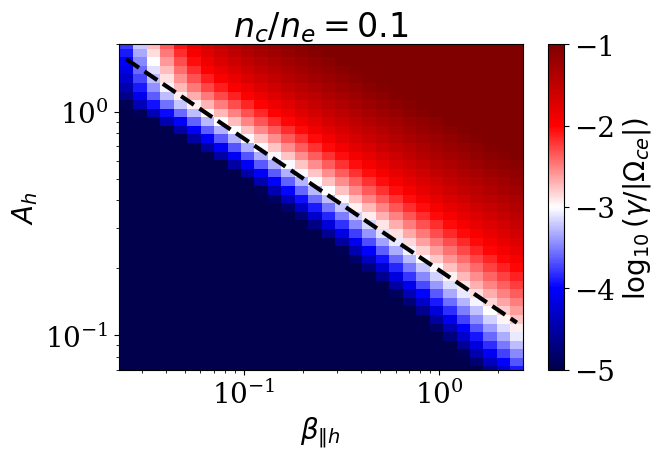

In [35]:
fig, ax = plt.subplots(figsize=(7, 5))
pos = ax.pcolormesh(beta, A, np.log10(gamma[4, :, :]).T, vmin=-5, vmax=-1, cmap="seismic")
ax.plot(beta, get_A(nc_n0=1-delta[4], beta_par=beta), color="black", linewidth=3, ls="--")
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_ylim(0.07, 2)

ax.set_title("$n_{c}/n_{e} = " + str(round(1-delta[4], 2)) + "$")
ax.set_xlabel(r"$\beta_{\|h}$")
ax.set_ylabel(r"$A_{h}$")

cbar = fig.colorbar(pos)
cbar.ax.set_ylabel("$\log_{10}(\gamma/|\Omega_{ce}|)$", rotation=90)
cbar.ax.set_yticks([-1, -2, -3, -4, -5])

plt.tight_layout()
plt.savefig("figs/gary_2012/marginal_stability_" + str(round(1-delta[4], 2)) +".png", dpi=600)

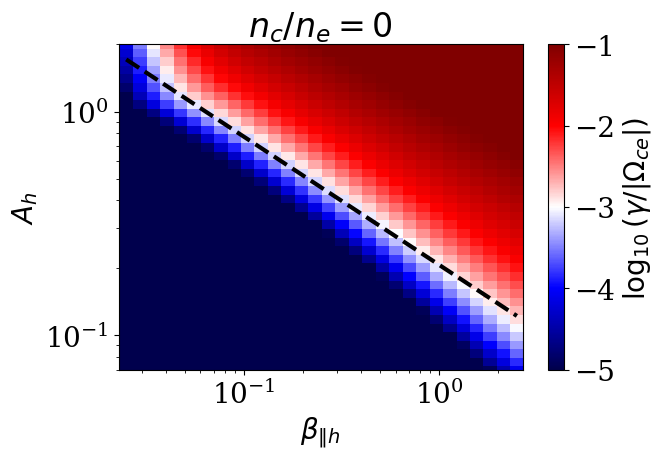

In [36]:
fig, ax = plt.subplots(figsize=(7, 5))
pos = ax.pcolormesh(beta, A, np.log10(gamma[5, :, :]).T, vmin=-5, vmax=-1, cmap="seismic")
ax.plot(beta, get_A(nc_n0=1-delta[5], beta_par=beta), color="black", linewidth=3, ls="--")
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_ylim(0.07, 2)

ax.set_title("$n_{c}/n_{e} =0$")
ax.set_xlabel(r"$\beta_{\|h}$")
ax.set_ylabel(r"$A_{h}$")

cbar = fig.colorbar(pos)
cbar.ax.set_ylabel("$\log_{10}(\gamma/|\Omega_{ce}|)$", rotation=90)
cbar.ax.set_yticks([-1, -2, -3, -4, -5])

plt.tight_layout()
plt.savefig("figs/gary_2012/marginal_stability_" + str(round(1-delta[5], 2)) +".png", dpi=600)